In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
# For Weather Data
"""
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
"""

"\nzip_path = tf.keras.utils.get_file(\n    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',\n    fname='jena_climate_2009_2016.csv.zip',\n    extract=True)\ncsv_path, _ = os.path.splitext(zip_path)\n"

In [3]:
# df = pd.read_csv(csv_path)  # for weather data
df = pd.read_csv('./Historic COVID-19 Dashboard Data.csv')
df.head()

,Date,Cases,Cumulative Cases,Deaths,Cumulative Deaths UK,Cumulative Deaths England,Cumulative Deaths Northern Ireland,Cumulative Deaths Scotland,Cumulative Deaths Wales,Cumulative Recovered Patients
0,31/01/2020,2.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN
1,01/02/2020,0.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN
2,02/02/2020,0.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN
3,03/02/2020,0.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN
4,04/02/2020,0.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        #     data.append(dataset[indices].values.reshape(history_size, 1)) # For weather data
        data.append(dataset[i-history_size:i].values.reshape(history_size, 1))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [5]:
TRAIN_SPLIT = 45 # 300000 for weather data
tf.random.set_seed(13)

In [6]:
# uni_data = df['T (degC)']
# uni_data.index = df['Date Time']

uni_data = df['Cumulative Cases']
uni_data.index = df['Date']
uni_data.head()

Date
31/01/2020    2.0
01/02/2020    2.0
02/02/2020    2.0
03/02/2020    2.0
04/02/2020    2.0
Name: Cumulative Cases, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9be949dc88>],
      dtype=object)

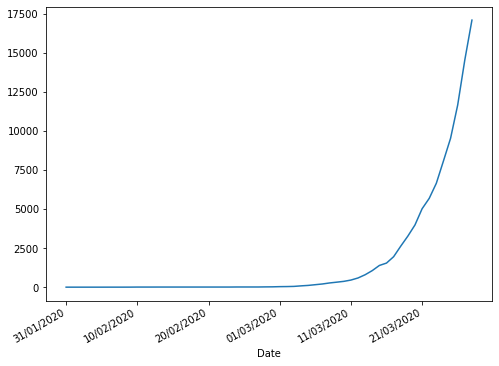

In [7]:
uni_data.plot(subplots=True)
# plt.plot(uni_data.index, uni_data, '*')
# plt.plot(kind='scatter', subplots=True)

In [8]:
uni_data = uni_data.dropna()
# print(uni_data)
# uni_data = tf.keras.utils.normalize(uni_data, axis=-1, order=0)

uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_data = (uni_data-uni_train_mean)/uni_train_std
# 

In [9]:
univariate_past_history = 20
univariate_future_target = 0
# print(uni_data)
x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)
x_train_uni.shape, y_train_uni.shape, x_val_uni.shape, y_val_uni.shape

((25, 20, 1), (25,), (0,), (0,))

In [10]:
def create_time_steps(length):
    return list(range(-length, 0))

def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
                   label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt


In [11]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target Cumulative Cases to predict')
print (y_train_uni[0])

Single window of past history
[[-0.46079278]
 [-0.46079278]
 [-0.46079278]
 [-0.46079278]
 [-0.46079278]
 [-0.46079278]
 [-0.45739516]
 [-0.45739516]
 [-0.45739516]
 [-0.45399754]
 [-0.44040706]
 [-0.44040706]
 [-0.44040706]
 [-0.43700944]
 [-0.43700944]
 [-0.43700944]
 [-0.43700944]
 [-0.43700944]
 [-0.43700944]
 [-0.43700944]]

 Target Cumulative Cases to predict
-0.4370094413183109


<module 'matplotlib.pyplot' from '/home/ash/Ash/venv3.6_tf_2/lib/python3.6/site-packages/matplotlib/pyplot.py'>

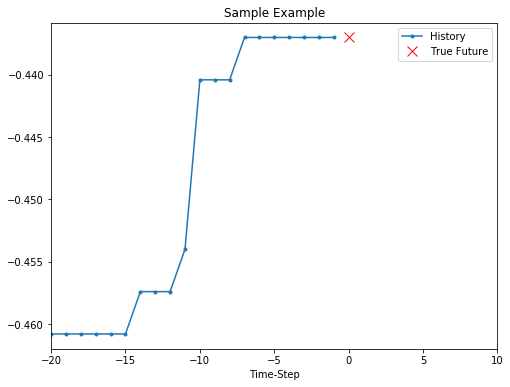

In [12]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

<module 'matplotlib.pyplot' from '/home/ash/Ash/venv3.6_tf_2/lib/python3.6/site-packages/matplotlib/pyplot.py'>

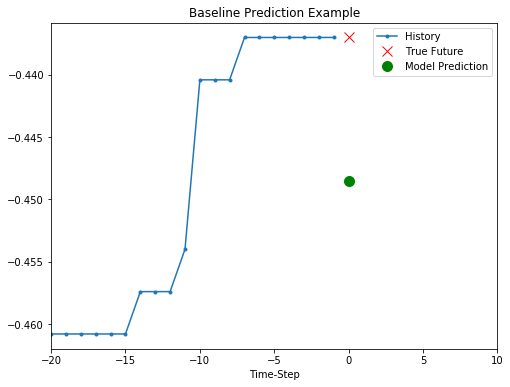

In [13]:
def baseline(history):
    return np.mean(history)

show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [14]:
BATCH_SIZE = 30
BUFFER_SIZE = 100

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()


In [15]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [16]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

In [17]:
EVALUATION_INTERVAL = 20
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=20)


Train for 20 steps, validate for 20 steps
Epoch 1/10
20/20 [==============================] - 2s 96ms/step - loss: 0.7331


ValueError: Error when checking input: expected lstm_input to have 3 dimensions, but got array with shape (None, 1)